In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\anupz\Desktop\simplilearn\Final Projects\Healthcare\Project 2\Healthcare - Diabetes"

C:\Users\anupz\Desktop\simplilearn\Final Projects\Healthcare\Project 2\Healthcare - Diabetes


In [3]:
df = pd.read_csv("health care diabetes.csv")

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Check the missing values

In [7]:
df.isnull().sum().value_counts()

0    9
dtype: int64

In [8]:
# There are no NaN values in the dataset.
# In the problem statement it is mentioned that 0 in the variables Glucose, Blood Pressure,SkinThickness,Insulin and BMI
# means there is a missing value.
# So we have to replace 0s in the above columns with appropriate values.
# One by one lets treat all the 0s in the above columns

In [9]:
df.Glucose.value_counts()[0]

5

In [10]:
# There are 5 missing values in Glucose column
# Lets plot the histogram and check the distribution of Glucose column

array([[<AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

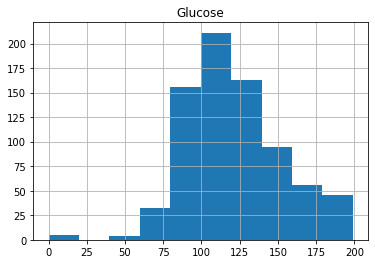

In [11]:
df.hist(column='Glucose')

In [12]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [13]:
# Since the mean and the median are roughly close to each other , it would be safe to impute the missing values 
# by either mean or median.
# From the histogram we can see the it is very lightly skewed. We can use its mean to impute the missing values.

In [14]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())

In [15]:
df[df.Glucose == 0].shape[0]

0

In [16]:
# There no more 0 values in Glucose column

In [17]:
df.BloodPressure.value_counts()[0]

35

In [18]:
# There are 35 missing values in BloodPressure column

In [19]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

array([[<AxesSubplot:title={'center':'BloodPressure'}>]], dtype=object)

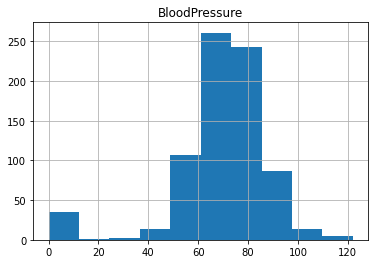

In [20]:
df.hist(column='BloodPressure')

In [21]:
# 35 missing values is big enough to offset the mean slightly. SO considering that the actual mean will be higher as
# whatever values are there will br greater than zero, the actual mean will be greater than 69.1 . So here I will choose
# the median value to impute the missing values.

In [22]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())

In [23]:
df.SkinThickness.value_counts()[0]

227

In [24]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

array([[<AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

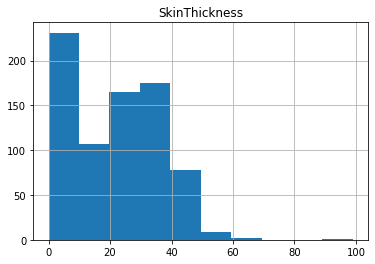

In [25]:
df.hist(column='SkinThickness')

In [26]:
# Since 227 missing values are having the value of zero . the data is offset. But viewing the histogram shows that majority
#of values lie in between 20-40. So impute the value of 30 for all missing values.

In [27]:
df.SkinThickness = df.SkinThickness.replace(0,30)

In [28]:
# SkinThickness also has an outlier.
# there seems like only one observation with the value of 99. It seems like an outlier. We can impute this outlier by imputing
# The value of 30

In [29]:
df.SkinThickness = df.SkinThickness.replace(99,30)

In [30]:
df.Insulin.value_counts()[0]

374

In [31]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

array([[<AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

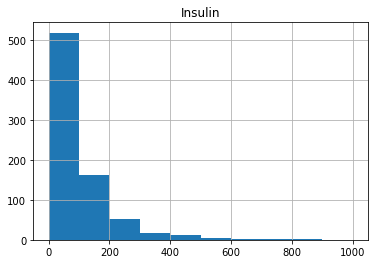

In [32]:
df.hist(column='Insulin',bins=[0,100,200,300,400,500,600,700,800,900,1000])

In [33]:
# Looking at the histogram, roughly 520 observations seems to have a value under 100 for insulin.
# Out of these 520, 374 observations have the value of 0 which means missing values.
# Which means that approximately 146 obervations have values under 100.
# Since the majority of values are under hundred and mean is also under hundred, we can use 
# the mean to impute the missing values

In [34]:
df.Insulin = df.Insulin.replace(0,df.Insulin.mean())

In [35]:
df.BMI.value_counts()[0]

11

In [36]:
df.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

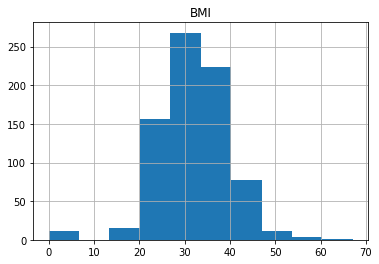

In [37]:
df.hist(column='BMI')

In [38]:
# Since mean and median are almost the same number, We can impute the missing values with median

In [39]:
df.BMI = df.BMI.replace(0,df.BMI.median())

In [40]:
# count(frequency) plot describing the data types and the count of variables

In [41]:
df.dtypes.value_counts()

int64      5
float64    4
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [43]:
# to create a countplot we will import the seaborn library

In [44]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

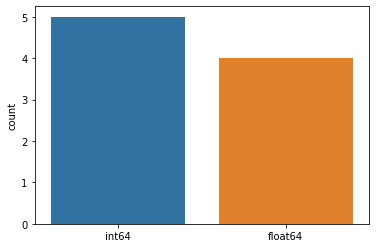

In [45]:
sns.countplot(data=df, x=df.dtypes.map(str))

In [46]:
#Check the balance of the data by plotting the count of outcomes by their value

<AxesSubplot:xlabel='Outcome', ylabel='count'>

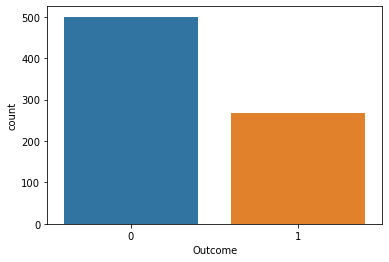

In [47]:
sns.countplot(data=df,x=df.Outcome)

In [48]:
# The data is imbalanced but not to the high degree. So I would like to continue and check the accuracy of the model.
# If the accuracy of the model is weak , then we can try balancing the data.

In [49]:
# Create scatter charts between the pair of variables

In [50]:
X = df.drop('Outcome',axis=1)

In [51]:
y = df.Outcome

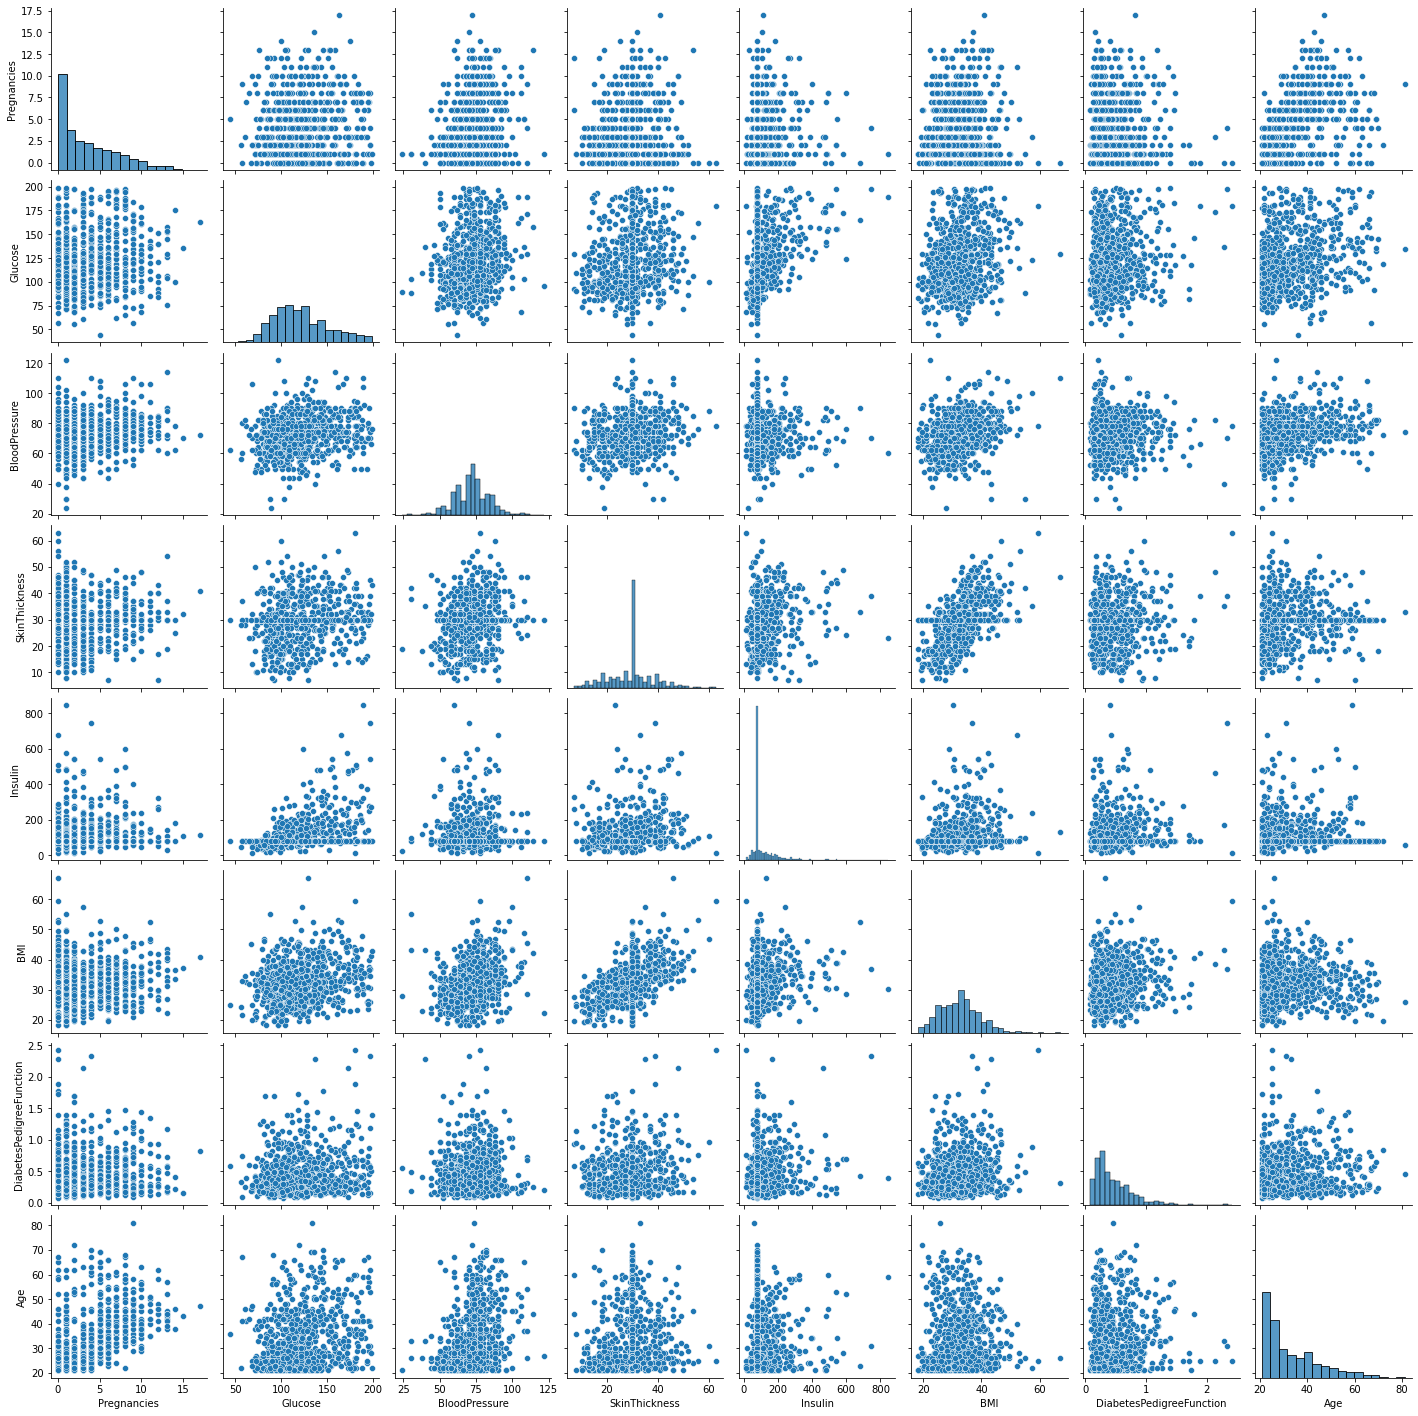

In [52]:
sns.pairplot(X)

In [53]:
# None of the pairs have any strong linear relationship
# SkinThickness-BMI , Glucose-Insulin , Pregnancies-Age pairs show weak linear relationship

In [54]:
# Correlation matrix and heatmap

In [55]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127964,0.208615,0.099357,-0.018082,0.021546,-0.033523,0.544341
Glucose,0.127964,1.000000,0.218623,0.176510,0.396597,0.231469,0.137106,0.266600
BloodPressure,0.208615,0.218623,1.000000,0.208541,0.006385,0.281132,-0.002378,0.324915
SkinThickness,0.099357,0.176510,0.208541,1.000000,0.140314,0.557524,0.094890,0.117351
Insulin,-0.018082,0.396597,0.006385,0.140314,1.000000,0.189850,0.157806,0.038652
BMI,0.021546,0.231469,0.281132,0.557524,0.189850,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137106,-0.002378,0.094890,0.157806,0.153506,1.000000,0.033561
Age,0.544341,0.266600,0.324915,0.117351,0.038652,0.025744,0.033561,1.000000


<AxesSubplot:>

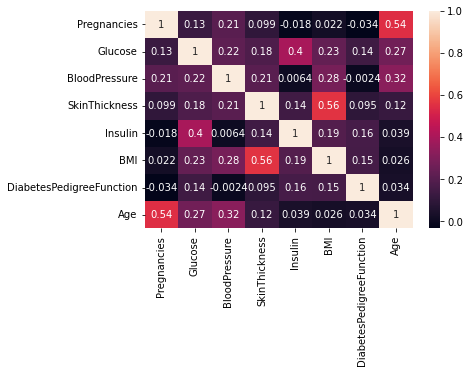

In [56]:
sns.heatmap(X.corr(),annot=True)

In [57]:
# the fators are not highly correlated.
# No multicollinearity in this dataset

In [58]:
# Steps for modelling :-
# Slpit the data into train data and test data.
# Standardize the data for better performance
# Apply various classification models to the data 
# Compare the performance metrics and select one model
# Describe the metrics and plot ROC curve

In [59]:
# Import the required libraries
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [62]:
# Standardizing the data

In [63]:
sc = StandardScaler()

In [64]:
X_train_std = sc.fit_transform(X_train)

In [65]:
X_test_std = sc.transform(X_test)

In [66]:
# Lets begin with as basic model of Logistic regression

In [67]:
LR = LogisticRegression()

In [68]:
model_LR = LR.fit(X_train_std,y_train)

In [69]:
model_LR.score(X_test_std,y_test)

0.7445887445887446

In [70]:
# 0.74 accuracy is okay but not great. Lets see if balancing of data helps to increase the accuracy

In [71]:
# Split into majoirty and minority data
df_majority = df[df.Outcome==0]
df_minority = df[df.Outcome==1]

In [72]:
# Upsample minority class
from sklearn.utils import resample

In [73]:
df_upsampled_minority = resample(df_minority,replace=True,n_samples=500,random_state=123)

In [74]:
df_upsampled_minority.shape

(500, 9)

In [75]:
df_majority.shape

(500, 9)

In [76]:
df_upsampled = pd.concat([df_majority, df_upsampled_minority])

In [77]:
df_upsampled.shape

(1000, 9)

In [78]:
df_upsampled.Outcome.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [79]:
#Now lets try modelling with balanced data

In [80]:
X_balanced = df_upsampled.drop('Outcome',axis=1)
y_balanced = df_upsampled.Outcome

In [81]:
# Lets go through the steps of modelling again

In [82]:
# Splitting the data

In [83]:
X_trainB,X_testB,y_trainB,y_testB = train_test_split(X_balanced,y_balanced,test_size=0.3,random_state=42)

In [84]:
# Standardizing the data

In [85]:
scB = StandardScaler()

In [86]:
X_trainB_std = scB.fit_transform(X_trainB)

In [87]:
X_testB_std = scB.transform(X_testB)

In [88]:
LRB = LogisticRegression()

In [89]:
model_LRB = LRB.fit(X_trainB_std,y_trainB)

In [90]:
model_LRB.score(X_testB_std,y_testB)

0.8133333333333334

In [91]:
# Balancing the data has definitely increased the accuracy of the model

In [93]:
y_pred_LR = model_LRB.predict(X_testB_std)

In [94]:
# Confusion matrix
cm_LR = confusion_matrix(y_testB,y_pred_LR)
cm_LR

array([[120,  30],
       [ 26, 124]], dtype=int64)

In [96]:
# Classification Report
print(classification_report(y_testB,y_pred_LR))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       150
           1       0.81      0.83      0.82       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [97]:
# Sensitivity means “out of all actual Positives, how many did we predict as Positive”
# Sensivity = TP/(TP+FN)
# Specificity means “out of all actual Negatives, how many did we predict as Negative”
# Speficity = TN/(TN+FP)

In [98]:
model_LR_sensitivity = cm_LR[0,0] / (cm_LR[0,0]+cm_LR[1,0])
model_LR_sensitivity

0.821917808219178

In [99]:
model_LR_specificity = cm_LR[1,1]/(cm_LR[1,1]+cm_LR[0,1])
model_LR_specificity

0.8051948051948052

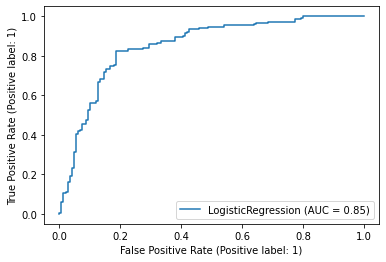

In [101]:
plot_roc_curve(LRB,X_testB_std,y_testB)

In [102]:
# # DecisionTreeClassifier

In [103]:
dtr = DecisionTreeClassifier()

In [104]:
model_dtr = dtr.fit(X_trainB_std,y_trainB)

In [105]:
model_dtr.score(X_testB_std,y_testB)

0.8133333333333334

In [106]:
y_pred_dtr = model_dtr.predict(X_testB_std)

In [107]:
cm_dtr = confusion_matrix(y_testB,y_pred_dtr)
cm_dtr

array([[111,  39],
       [ 17, 133]], dtype=int64)

In [108]:
print(classification_report(y_testB,y_pred_dtr))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       150
           1       0.77      0.89      0.83       150

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [109]:
model_dtr_sensitivity = cm_dtr[0,0] / (cm_dtr[0,0]+cm_dtr[1,0])
model_dtr_sensitivity

0.8671875

In [110]:
model_dtr_specificity = cm_dtr[1,1]/(cm_dtr[1,1]+cm_dtr[0,1])
model_dtr_specificity

0.7732558139534884

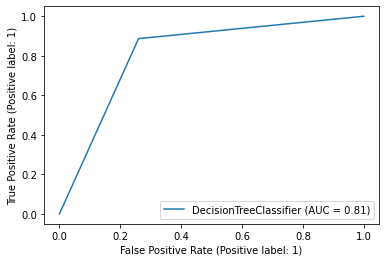

In [111]:
plot_roc_curve(dtr,X_testB_std,y_testB)

In [112]:
# Support Vector classifier

In [113]:
svc = SVC()

In [114]:
model_svc = svc.fit(X_trainB_std,y_trainB)

In [115]:
model_svc.score(X_testB_std,y_testB)

0.8433333333333334

In [116]:
y_pred_svc = model_svc.predict(X_testB_std)

In [117]:
cm_svc = confusion_matrix(y_testB,y_pred_svc)
cm_svc

array([[119,  31],
       [ 16, 134]], dtype=int64)

In [118]:
print(classification_report(y_testB,y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       150
           1       0.81      0.89      0.85       150

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



In [119]:
model_svc_sensitivity = cm_svc[0,0] / (cm_svc[0,0]+cm_svc[1,0])
model_svc_sensitivity

0.8814814814814815

In [120]:
model_svc_specificity = cm_svc[1,1]/(cm_svc[1,1]+cm_svc[0,1])
model_svc_specificity

0.8121212121212121

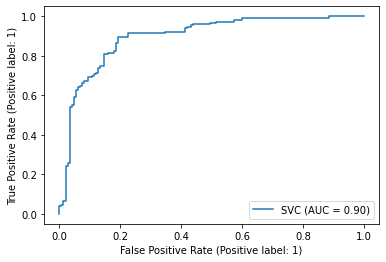

In [121]:
plot_roc_curve(svc,X_testB_std,y_testB)

In [122]:
# Naive Bayesian

In [123]:
NB = GaussianNB()

In [124]:
model_NB = NB.fit(X_trainB_std,y_trainB)

In [125]:
model_NB.score(X_testB_std,y_testB)

0.79

In [126]:
y_pred_NB = model_NB.predict(X_testB_std)

In [127]:
cm_NB = confusion_matrix(y_testB,y_pred_NB)
cm_NB

array([[121,  29],
       [ 34, 116]], dtype=int64)

In [128]:
print(classification_report(y_testB,y_pred_NB))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.80      0.77      0.79       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [129]:
model_NB_sensitivity = cm_NB[0,0] / (cm_NB[0,0]+cm_NB[1,0])
model_NB_sensitivity

0.7806451612903226

In [130]:
model_NB_specificity = cm_NB[1,1]/(cm_NB[1,1]+cm_NB[0,1])
model_NB_specificity

0.8

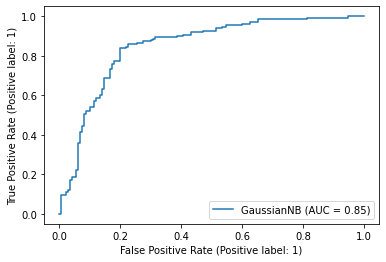

In [131]:
plot_roc_curve(NB,X_testB_std,y_testB)

In [132]:
# KNN

In [133]:
KNN = KNeighborsClassifier()

In [134]:
model_KNN = KNN.fit(X_trainB_std,y_trainB)

In [135]:
model_KNN.score(X_testB_std,y_testB)

0.7766666666666666

In [137]:
y_pred_KNN = model_NB.predict(X_testB_std)

In [138]:
cm_KNN = confusion_matrix(y_testB,y_pred_KNN)
cm_KNN

array([[121,  29],
       [ 34, 116]], dtype=int64)

In [139]:
print(classification_report(y_testB,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.80      0.77      0.79       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [140]:
model_KNN_sensitivity = cm_KNN[0,0] / (cm_KNN[0,0]+cm_KNN[1,0])
model_KNN_sensitivity

0.7806451612903226

In [141]:
model_KNN_specificity = cm_KNN[1,1]/(cm_KNN[1,1]+cm_KNN[0,1])
model_KNN_specificity

0.8

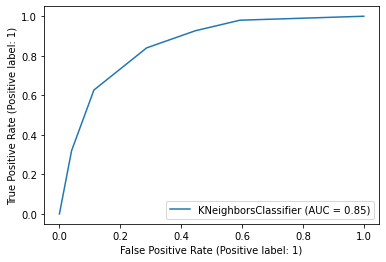

In [142]:
plot_roc_curve(KNN,X_testB_std,y_testB)

In [143]:
# Lets summarize the results in the form of a table

In [144]:
models = ['LR','DTR','SVC','NB','KNN']
table = pd.DataFrame(columns=models,index=['Accuracy','Sensitivity','Specificity','AUC'])

In [145]:
table.LR =[0.81,0.82,0.81,0.85]
table.DTR = [0.81,0.86,0.77,0.81]
table.SVC = [0.84,0.88,0.81,0.9]
table.NB= [0.79,0.78,0.8,0.85]
table.KNN = [0.77,0.78,0.8,0.85]

In [146]:
table

,LR,DTR,SVC,NB,KNN
Accuracy,0.81,0.81,0.84,0.79,0.77
Sensitivity,0.82,0.86,0.88,0.78,0.78
Specificity,0.81,0.77,0.81,0.80,0.80
AUC,0.85,0.81,0.90,0.85,0.85


In [147]:
# From the above table we can see that SVC model gives the best results as 
# all the metrics in SVC are better than the other models

In [148]:
# Lets convert our preprocessed data into xls file to create reporting in Tableau

In [149]:
df.to_excel("Healthcare_data_preprocessed.xlsx")